In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier as DTC
from sklearn.cross_validation import StratifiedKFold

E:\anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


The header may contain special chars, e.g. "(kg/m²)", which can cause some errors, so we need to remove them

In [2]:
header = open("newly_diagnosed.csv").readlines()[0]
header = header.strip().split(",")[1:]
for i in range(len(header)):
    header[i] = header[i].split("(")[0].replace(' ','')
header

['Peptide1',
 'Peptide2',
 'Peptide3',
 'Peptide4',
 'Peptide5',
 'Peptide6',
 'Peptide7',
 'Peptide8',
 'Peptide9',
 'Peptide10',
 'Peptide11',
 'Peptide12',
 'Peptide13',
 'Peptide14',
 'Peptide15',
 'Peptide16',
 'Peptide17',
 'Peptide18',
 'Peptide21',
 'Peptide22',
 'Peptide23',
 'Peptide24',
 'Peptide25',
 'Peptide26',
 'Peptide27',
 'Peptide29',
 'Peptide30',
 'Age',
 'Diagnosis',
 'BMI',
 'HbA1c',
 'Gender',
 'Height',
 'Bodyweight',
 'BMI',
 'Bodyfat',
 'Fatfreemass',
 'Waist',
 'Hip',
 'WHR',
 'Hemoglobin',
 'Erythrozyten',
 'Thrombozyten',
 'Leukocytes',
 'ALAT',
 'ASAT',
 'gGT',
 'Fastingplasmaglucose',
 'Fastingplasmainsulin',
 'C-Peptide',
 'Proinsulin',
 'Creatinin',
 'Triglycerides',
 'Cholesteroltotal',
 'HDL-Cholesterol',
 'LDL-Cholesterol',
 'Proteinstotal',
 'Albumin',
 'TSH',
 'fT3',
 'fT4',
 'Cortisol',
 'Testosteron',
 'HOMA-IR',
 'Freefattyacids',
 'RRsys',
 'RRdia',
 'ssCRP']

read data, skip the first row, and give the col names manually

In [3]:
df = pd.read_csv("newly_diagnosed.csv",index_col=0,skiprows=[0],header=None,names=header)

E:\anaconda3\lib\site-packages\pandas\io\parsers.py:709: UserWarning: Duplicate names specified. This will raise an error in the future.
  return _read(filepath_or_buffer, kwds)


In [4]:
df.shape

(96, 68)

In [5]:
df.head()

,Peptide1,Peptide2,Peptide3,Peptide4,Peptide5,Peptide6,Peptide7,Peptide8,Peptide9,Peptide10,...,TSH,fT3,fT4,Cortisol,Testosteron,HOMA-IR,Freefattyacids,RRsys,RRdia,ssCRP
sample 2,33.58,7.18,9.35,3.57,94.44,14.91,153.05,35.52,9.76,71.20,...,0.72,5.23,21.5,NaN,NaN,7.2,0.30,NaN,NaN,0.48
sample 3,37.57,8.70,10.79,3.36,94.11,15.99,198.88,39.65,8.62,75.48,...,0.97,NaN,NaN,NaN,NaN,9.3,1.04,NaN,NaN,7.15
sample 4,27.31,5.42,5.64,2.75,67.01,11.91,148.32,28.90,5.64,59.26,...,1.02,5.01,17.6,NaN,NaN,9.1,0.37,NaN,NaN,NaN
sample 5,29.09,5.81,4.69,3.61,65.99,12.42,154.55,26.48,6.38,53.50,...,1.00,4.61,15.7,NaN,NaN,24.5,0.99,168.0,95.0,0.20
sample 6,41.13,8.40,8.85,3.56,109.13,17.60,209.62,44.35,10.43,84.78,...,1.30,5.43,19.2,NaN,NaN,11.1,0.54,165.0,84.0,0.30


The WHR column has some spaces, which causes the read_csv function not able to read it as float

This situation is very common in data science where users didn't provide clean dataset

In [6]:

df['WHR'] = pd.to_numeric(df['WHR'].str.replace(' ',''))
df = df.fillna(df.mean())
df.head()

,Peptide1,Peptide2,Peptide3,Peptide4,Peptide5,Peptide6,Peptide7,Peptide8,Peptide9,Peptide10,...,TSH,fT3,fT4,Cortisol,Testosteron,HOMA-IR,Freefattyacids,RRsys,RRdia,ssCRP
sample 2,33.58,7.18,9.35,3.57,94.44,14.91,153.05,35.52,9.76,71.20,...,0.72,5.230000,21.500000,256.9552,38.047609,7.2,0.30,133.980392,84.862745,0.480000
sample 3,37.57,8.70,10.79,3.36,94.11,15.99,198.88,39.65,8.62,75.48,...,0.97,5.151061,16.621212,256.9552,38.047609,9.3,1.04,133.980392,84.862745,7.150000
sample 4,27.31,5.42,5.64,2.75,67.01,11.91,148.32,28.90,5.64,59.26,...,1.02,5.010000,17.600000,256.9552,38.047609,9.1,0.37,133.980392,84.862745,2.520263
sample 5,29.09,5.81,4.69,3.61,65.99,12.42,154.55,26.48,6.38,53.50,...,1.00,4.610000,15.700000,256.9552,38.047609,24.5,0.99,168.000000,95.000000,0.200000
sample 6,41.13,8.40,8.85,3.56,109.13,17.60,209.62,44.35,10.43,84.78,...,1.30,5.430000,19.200000,256.9552,38.047609,11.1,0.54,165.000000,84.000000,0.300000


All the gender column is male, not informative, therefore we removed it

In [7]:
df = df.drop('Gender',axis=1)

In [8]:
df.shape

(96, 67)

# Classification

## Concepts

### Target variable

Target variable is the label, basically, you want to build a model so that it can predict the target value.

This variable is often times refered as 'Y'.

### Feature variables

Feature variables are the measurements. Basically, you want to use these features to predict the target value.

The features together, is refered as 'X'.

In [9]:
mapping = {} # the key value will be replace to 1 or 0
mapping['T2D'] = 1
mapping['NGT'] = 0
target = df.Diagnosis.replace(mapping) # here I'm using target, instead of Y, just for ease of understanding. I don't do this usually.
target

sample 2      1
sample 3      1
sample 4      1
sample 5      1
sample 6      1
sample 7      1
sample 8      1
sample 9      0
sample 10     1
sample 11     0
Sample 12     1
Sample 13     1
Sample 14     1
Sample 15     0
Sample 16     1
Sample 17     1
Sample 18     1
Sample 19     1
Sample 20     1
Sample 21     1
Sample 22     1
Sample 23     0
Sample 24     1
Sample 25     1
Sample 26     0
Sample 27     0
Sample 28     1
Sample 29     1
Sample 30     1
Sample 31     0
             ..
Sample 71     1
Sample 72     1
Sample 73     1
Sample 74     1
Sample 75     1
Sample 76     1
Sample 77     1
Sample 78     1
Sample 79     0
Sample 80     0
Sample 81     1
Sample 82     1
Sample 83     1
Sample 84     0
Sample 85     0
Sample 86     0
Sample 87     0
Sample 88     0
Sample 89     0
Sample 90     0
Sample 91     1
Sample 92     1
Sample 93     0
Sample 94     0
Sample 95     0
Sample 96     1
Sample 97     0
Sample 98     0
Sample 99     1
Sample 100    0
Name: Diagnosis, Length:

X should not contain the target values, so let's remove that column

In [10]:
X = df.drop('Diagnosis',axis=1)

## K-fold cross validation

### K-fold

Divide your data into k pieces

### cross validation

Use (k-1) folds to train and use the remaining 1 fold to test

Therefore you will have a list of accuracies. In the end, you tell us the average.

This procedure is called cross validation, or CV.


In [12]:
from sklearn.metrics import confusion_matrix
import numpy as np
acc_list = []
se_list = []
sp_list = []
for train_index, test_index in StratifiedKFold(target, n_folds=10,shuffle=True):
    train_x = X.iloc[train_index,:]
    train_y = target[train_index]
    test_x = X.iloc[test_index,:]
    test_y = target[test_index]
    dt_clf=DTC()
    dt_clf.fit(train_x, train_y)
    y_pred_dt = dt_clf.predict(test_x)
    tn, fp, fn, tp = confusion_matrix(test_y, y_pred_dt).ravel()
    accuracy = (tp+tn)/(tn+tp+fn+fp)
    sensitivity = tp/(fn+tp)
    specificity = tn/(tn+fp)
    acc_list.append(accuracy)
    se_list.append(sensitivity)
    sp_list.append(specificity) 
    
np.mean(acc_list)

0.845

This above accuracy is not good, this is because the parameters are not good.

Parameter tuning is often the most difficult part in machine learning. There are more than 1 answers, or there's no answer at all.

Right now, you can just use the best parameter I found

In [13]:
acc_list = []
se_list = []
sp_list = []
subX = X[['Peptide27','HbA1c']]
for train_index, test_index in StratifiedKFold(target, n_folds=10,shuffle=True):
    train_x = subX.iloc[train_index,:]
    train_y = target[train_index]
    test_x = subX.iloc[test_index,:]
    test_y = target[test_index]
    dt_clf=DTC(max_depth = 2)
    dt_clf.fit(train_x, train_y)
    y_pred_dt = dt_clf.predict(test_x)
    tn, fp, fn, tp = confusion_matrix(test_y, y_pred_dt).ravel()
    accuracy = (tp+tn)/(tn+tp+fn+fp)
    sensitivity = tp/(fn+tp)
    specificity = tn/(tn+fp)
    acc_list.append(accuracy)
    se_list.append(sensitivity)
    sp_list.append(specificity)  
np.mean(acc_list)

0.96

### install graphviz to visulize your tree

conda install graphviz

conda install python-graphviz

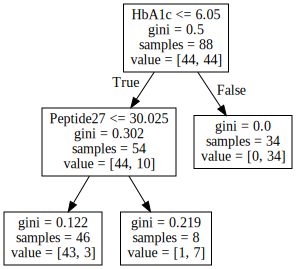

In [18]:
from sklearn.tree import export_graphviz
from IPython.display import SVG
from graphviz import Source
graph = Source(export_graphviz(dt_clf, out_file=None, feature_names=['Peptide27','HbA1c']))
SVG(graph.pipe(format='svg'))